In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
transform = transforms.ToTensor()

In [7]:
train_data = datasets.MNIST(root = '../Data' , train= True, download= True, transform = transform) 

In [9]:
test_data = datasets.MNIST(root = '../Data' , train= False, download= True, transform = transform)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [12]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [13]:
type(train_data[0])

tuple

In [14]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [15]:
train_data[0][1]

5

In [16]:
image,label = train_data[0]

In [17]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [18]:
label

5

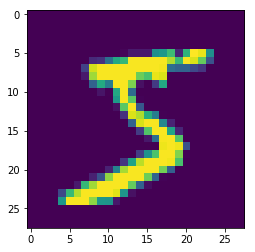

In [19]:
plt.imshow(image.reshape((28,28)))

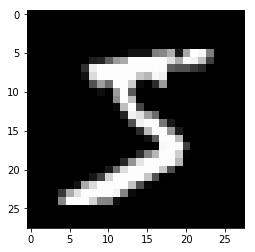

In [20]:
plt.imshow(image.reshape((28,28)),cmap= "gray")

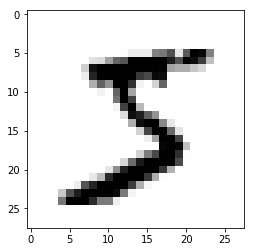

In [21]:
plt.imshow(image.reshape((28,28)),cmap= "gist_yarg")

In [23]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=100,shuffle = True)
test_loader = DataLoader(test_data,batch_size=500,shuffle = False)

In [24]:
# for grabbing the first batch
for images,label in train_loader:
    break

In [25]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [26]:
label

tensor([0, 5, 7, 8, 6, 7, 9, 7, 1, 3, 8, 4, 4, 2, 2, 1, 3, 7, 1, 6, 3, 1, 0, 4,
        6, 4, 6, 9, 1, 1, 4, 0, 1, 4, 1, 8, 9, 3, 2, 1, 0, 9, 3, 1, 1, 3, 0, 2,
        1, 6, 7, 5, 5, 1, 3, 7, 4, 9, 2, 9, 9, 7, 0, 9, 8, 5, 2, 1, 8, 8, 6, 1,
        7, 3, 9, 4, 8, 5, 3, 0, 4, 4, 7, 9, 3, 4, 2, 8, 8, 5, 3, 5, 6, 8, 1, 2,
        7, 0, 6, 7])

In [27]:
images.shape

torch.Size([100, 1, 28, 28])

In [28]:
label.shape

torch.Size([100])

In [32]:
class model(nn.Module):
    def __init__(self):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_features = 784, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 84)
        self.fc3 = nn.Linear(in_features = 84, out_features = 10)
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)
        
        

In [33]:
torch.manual_seed(101)

In [34]:
model = model()

In [35]:
model.parameters

<bound method Module.parameters of model(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [36]:
for params in model.parameters():
    print(params)

Parameter containing:
tensor([[-0.0216, -0.0036, -0.0292,  ..., -0.0166, -0.0342, -0.0019],
        [ 0.0088,  0.0261,  0.0046,  ...,  0.0073,  0.0056, -0.0018],
        [-0.0336, -0.0348, -0.0216,  ..., -0.0165,  0.0112,  0.0169],
        ...,
        [-0.0076,  0.0201,  0.0078,  ..., -0.0320,  0.0136,  0.0322],
        [ 0.0054,  0.0088, -0.0012,  ..., -0.0004,  0.0340, -0.0168],
        [ 0.0025, -0.0317,  0.0235,  ...,  0.0104, -0.0027,  0.0276]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0225,  0.0126, -0.0301,  0.0324,  0.0033, -0.0250,  0.0008, -0.0147,
        -0.0153, -0.0268,  0.0257,  0.0021, -0.0340, -0.0067, -0.0083,  0.0333,
        -0.0021, -0.0307,  0.0213,  0.0069, -0.0189, -0.0086,  0.0175, -0.0112,
        -0.0018, -0.0016, -0.0259, -0.0240, -0.0082,  0.0048,  0.0234,  0.0241,
         0.0293, -0.0041, -0.0011, -0.0089, -0.0171, -0.0269,  0.0252,  0.0048,
        -0.0211,  0.0184, -0.0338,  0.0242,  0.0318, -0.0051,  0.0258, -0.0325,
         0.0011

In [37]:
for params in model.parameters():
    print(params.numel())

94080
120
10080
84
840
10


In [38]:
for params in model.parameters():
    print(params.size())

torch.Size([120, 784])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [39]:
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(),lr=0.001)

In [40]:
images.shape

torch.Size([100, 1, 28, 28])

In [42]:
images.view(100,-1).shape

torch.Size([100, 784])

In [43]:
import time
start_time = time.time()

#training
epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train,y_train) in enumerate(train_loader):
        
        b+=1
        
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        if b%200 == 0:
            
            acc = trn_corr.item()*100/(100*b)
            
            print(f'Epoch {i}   batch {b}    loss:{loss.item()}  accuracy : {acc}')
    
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for b , (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data,1)[1]
            batch_corr = (predicted ==y_test).sum()
            tst_corr +=  batch_corr
        
        loss = criterion(y_val,y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)

total_time = time.time()-start_time

print(f'Duration : {total_time/60}mins')

Epoch 0   batch 200    loss:0.2805540859699249  accuracy : 83.04
Epoch 0   batch 400    loss:0.20303486287593842  accuracy : 87.325
Epoch 0   batch 600    loss:0.20227622985839844  accuracy : 89.32333333333334
Epoch 1   batch 200    loss:0.1445707082748413  accuracy : 94.56
Epoch 1   batch 400    loss:0.10489675402641296  accuracy : 95.11
Epoch 1   batch 600    loss:0.12034713476896286  accuracy : 95.34666666666666
Epoch 2   batch 200    loss:0.11627233773469925  accuracy : 96.53
Epoch 2   batch 400    loss:0.08906286954879761  accuracy : 96.615
Epoch 2   batch 600    loss:0.10235458612442017  accuracy : 96.74
Epoch 3   batch 200    loss:0.053589120507240295  accuracy : 97.475
Epoch 3   batch 400    loss:0.05533469840884209  accuracy : 97.485
Epoch 3   batch 600    loss:0.05723271518945694  accuracy : 97.51
Epoch 4   batch 200    loss:0.1291753351688385  accuracy : 97.96
Epoch 4   batch 400    loss:0.09339297562837601  accuracy : 97.995
Epoch 4   batch 600    loss:0.13001050055027008  

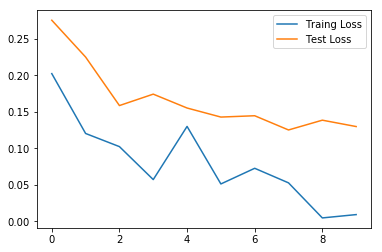

In [76]:
plt.plot(train_losses,label='Traing Loss')
plt.plot(test_losses,label = 'Test Loss')
plt.legend()

In [44]:
train_correct

[tensor(53594),
 tensor(57208),
 tensor(58044),
 tensor(58506),
 tensor(58820),
 tensor(59014),
 tensor(59227),
 tensor(59387),
 tensor(59435),
 tensor(59541)]

In [78]:
train_correct[0]/600

tensor(89)

In [81]:
test_correct[0]/100

tensor(94)

In [45]:
train_acc = [t/600 for t in train_correct]

In [46]:
test_acc = [t/100 for t in test_correct]

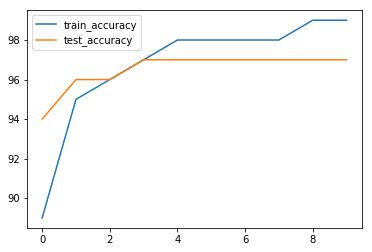

In [47]:
plt.plot(train_acc, label = "train_accuracy")
plt.plot(test_acc, label = "test_accuracy")
plt.legend()

In [48]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [49]:
# Scoring on unseen data
with torch.no_grad():
    correct=0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()
    

In [90]:
100*correct.item()/len(X_test)

97.67

In [51]:
correct.item()

9767

In [52]:
predicted

tensor([7, 2, 1,  ..., 4, 5, 6])

In [53]:
y_test

tensor([7, 2, 1,  ..., 4, 5, 6])

In [94]:
# confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 970,    0,    2,    0,    0,    3,    4,    1,    4,    3],
       [   0, 1120,    2,    0,    0,    0,    3,    2,    0,    2],
       [   1,    4, 1003,    2,    2,    0,    2,    5,    3,    0],
       [   3,    3,    8,  996,    1,   22,    1,    2,    5,    9],
       [   0,    0,    2,    0,  962,    3,    8,    1,    3,   10],
       [   1,    0,    0,    1,    0,  853,    2,    0,    2,    3],
       [   1,    2,    1,    0,    4,    4,  935,    0,    1,    0],
       [   1,    1,    7,    6,    4,    1,    1, 1015,    5,   12],
       [   2,    5,    6,    4,    2,    6,    2,    1,  949,    6],
       [   1,    0,    1,    1,    7,    0,    0,    1,    2,  964]],
      dtype=int64)

In [54]:
confusion_matrix(predicted,y_test)

array([[ 970,    0,    2,    0,    0,    3,    4,    1,    4,    3],
       [   0, 1120,    2,    0,    0,    0,    3,    2,    0,    2],
       [   1,    4, 1003,    2,    2,    0,    2,    5,    3,    0],
       [   3,    3,    8,  996,    1,   22,    1,    2,    5,    9],
       [   0,    0,    2,    0,  962,    3,    8,    1,    3,   10],
       [   1,    0,    0,    1,    0,  853,    2,    0,    2,    3],
       [   1,    2,    1,    0,    4,    4,  935,    0,    1,    0],
       [   1,    1,    7,    6,    4,    1,    1, 1015,    5,   12],
       [   2,    5,    6,    4,    2,    6,    2,    1,  949,    6],
       [   1,    0,    1,    1,    7,    0,    0,    1,    2,  964]],
      dtype=int64)